In [1]:
import stingray as st
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

pnhdu = fits.open('0886010101_PN12_dt1.lc')
m1hdu = fits.open('0886010101_M112_dt5.lc')
m2hdu = fits.open('0886010101_M212_dt5.lc')

plt.rcParams['figure.figsize'] = [12,9]

In [2]:
pn_time = pnhdu[1].data.field('TIME')
pn_rate = pnhdu[1].data.field('RATE')
pn_rerr = pnhdu[1].data.field('ERROR')
m1_time = m1hdu[1].data.field('TIME')
m1_rate = m1hdu[1].data.field('RATE')
m1_rerr = m1hdu[1].data.field('ERROR')
m2_time = m2hdu[1].data.field('TIME')
m2_rate = m2hdu[1].data.field('RATE')
m2_rerr = m2hdu[1].data.field('ERROR')

pngtis = []
for i in pnhdu['SRC_GTIS'].data:
    pngtis.append([i[0],i[1]])
    
m1gtis = []
for i in m1hdu['SRC_GTIS'].data:
    m1gtis.append([i[0],i[1]])
    
m2gtis = []
for i in m2hdu['SRC_GTIS'].data:
    m2gtis.append([i[0],i[1]])
    
m1gtis[0][0] = pngtis[0][0]
m2gtis[0][0] = pngtis[0][0]
    
t0 = pngtis[0][0]

In [3]:
pnlc = st.Lightcurve(pn_time,pn_rate,pn_rerr,gti=pngtis,input_counts=False)
m1lc = st.Lightcurve(m1_time,m1_rate,m1_rerr,gti=m1gtis,input_counts=False)
m2lc = st.Lightcurve(m2_time,m2_rate,m2_rerr,gti=m2gtis,input_counts=False)

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


In [4]:
pnlc = pnlc.shift(-t0)
m1lc = m1lc.shift(-t0)
m2lc = m2lc.shift(-t0)

In [5]:
pn_seg1 = pnlc.truncate(start=0, stop=6000, method='time')
m1_seg1 = m1lc.truncate(start=0, stop=6000, method='time')
m2_seg1 = m2lc.truncate(start=0, stop=6000, method='time')

pn_seg1 = pn_seg1.rebin(25)
m1_seg1 = m1_seg1.rebin(25)
m2_seg1 = m2_seg1.rebin(25)

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:408: RuntimeWarning: invalid value encountered in multiply
  counts_err = self._countrate_err * self.dt
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:388: RuntimeWarning: invalid value encountered in multiply
  counts = self._countrate * self.dt


In [6]:
pn_seg2 = pnlc.truncate(start=6500, stop=27500, method='time')
m1_seg2 = m1lc.truncate(start=6500, stop=27500, method='time')
m2_seg2 = m2lc.truncate(start=6500, stop=27500, method='time')

pn_seg2 = pn_seg2.rebin(25)
m1_seg2 = m1_seg2.rebin(25)
m2_seg2 = m2_seg2.rebin(25)

In [7]:
print(pn_seg1.time[0],pn_seg1.time[-1])
print(m1_seg1.time[0],m1_seg1.time[-1])
print(m2_seg1.time[0],m2_seg1.time[-1])

12.5 5987.5
12.5 5987.5
12.5 5987.5


In [8]:
print(pn_seg2.time[0],pn_seg2.time[-1])
print(m1_seg2.time[0],m1_seg2.time[-1])
print(m2_seg2.time[0],m2_seg2.time[-1])

6512.5 27487.5
6512.5 27487.5
6512.5 27487.5


In [9]:
seg1lc = pn_seg1 + m1_seg1 + m2_seg1
seg2lc = pn_seg2 + m1_seg2 + m2_seg2

In [10]:
all_lc = seg1lc.join(seg2lc)

<AxesSubplot:xlabel='Time (s)', ylabel='counts'>

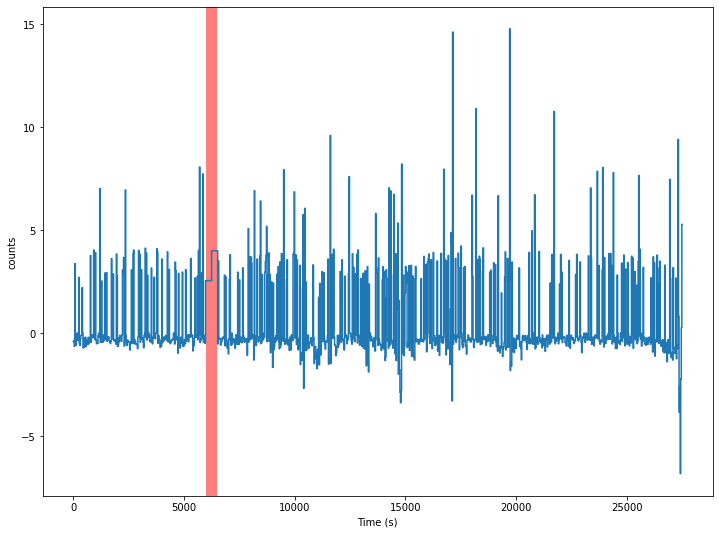

In [11]:
all_lc.plot()

<AxesSubplot:xlabel='Time (s)', ylabel='counts'>

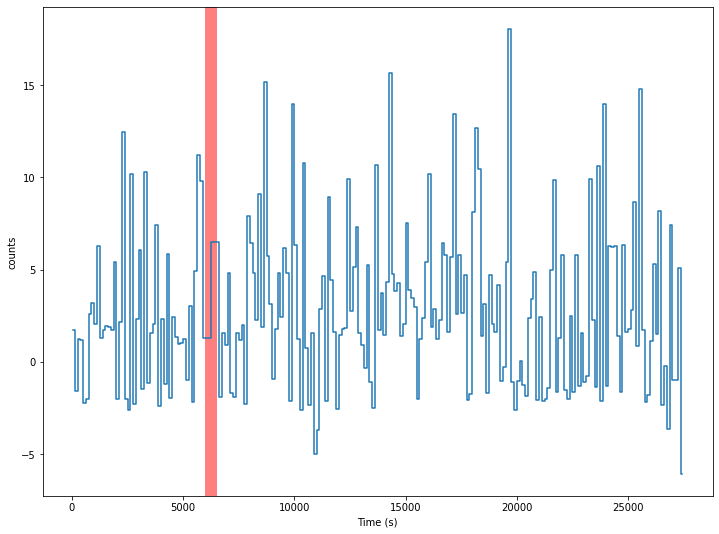

In [16]:
dt = 125
all_lc.rebin(dt).plot()